<img src=https://lstms-brainybits.s3.ap-south-1.amazonaws.com/green+logo.png width="300" height="200" style="float: left; margin-right: 8px;">

We believe in empowering individuals with the
knowledge and skills they need to become lifelong
learners. Our self-learning website offers a diverse
range of high-quality, interactive courses.
**All rights reserved to BrainyBits. Unauthorized reproduction or distribution of this content is prohibited.**

# Support Vector Machine (SVM)

### 1. Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 2. Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### 3. Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### 4. Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 5. Hyperparameter tuning for a Support Vector Machine model using scikit-learn's GridSearchCV

In [6]:
from sklearn import svm 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
svm_model = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel':['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [0.01, 0.1, 1, 'scale']
}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 'scale'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

### 6.Train the model

In [7]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 'scale'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

### 7. Best hyperparameters

In [10]:

Best_Hyperparameters = grid_search.best_params_
Best_Hyperparameters

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

### 8.Accuracy of the test data

In [11]:
from sklearn.metrics import confusion_matrix
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.93


### 9.Confussion Matrix

In [12]:
y_pred = best_model.predict(X_test)
# confusion matrix

# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[64  4]
 [ 3 29]]

True Positives(TP) =  64

True Negatives(TN) =  29

False Positives(FP) =  4

False Negatives(FN) =  3


### 10. Visualising the Confusion Matrix result

Text(95.72222222222221, 0.5, 'Truth')

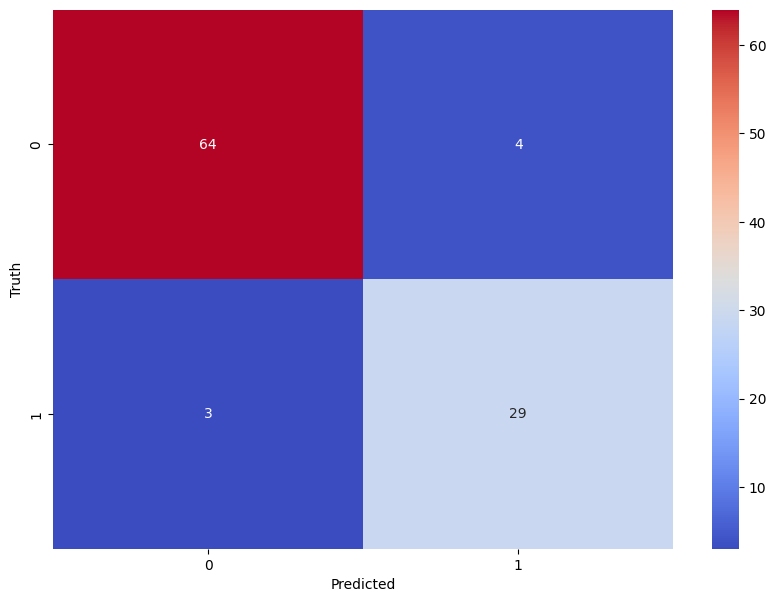

In [13]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d',cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### 11. Visualising the Training set results

/var/folders/8y/mk6zbj254zv1ybp0yx46tvy00000gn/T/ipykernel_18267/4116968565.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


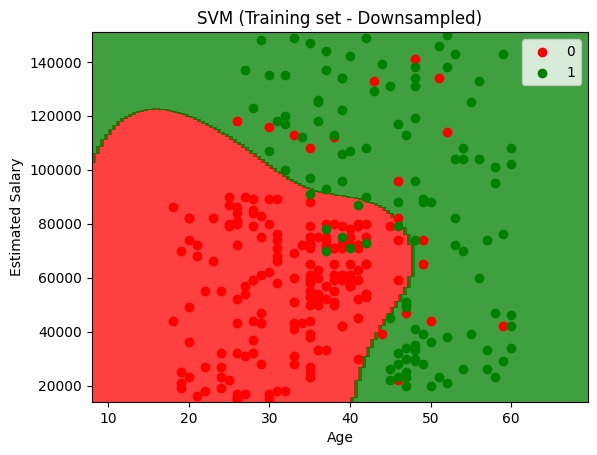

In [14]:
from matplotlib.colors import ListedColormap
train_sample_size = 300  
train_indices = np.random.choice(len(X_train), size=train_sample_size, replace=False)
X_set, y_set = sc.inverse_transform(X_train[train_indices]), y_train[train_indices]

# Meshgrid with a larger step size for visualization
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.5),
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.5))

# Contour plot
plt.contourf(X1, X2, grid_search.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot for the downsampled training set
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('SVM (Training set - Downsampled)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


### 12. Visualising the Test set results

/var/folders/8y/mk6zbj254zv1ybp0yx46tvy00000gn/T/ipykernel_18267/3028471605.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


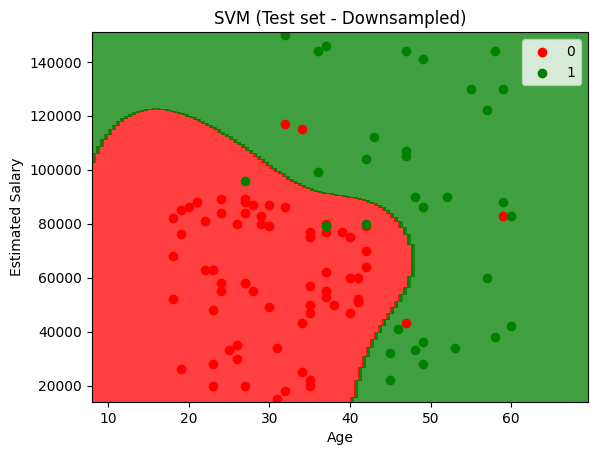

In [15]:
from matplotlib.colors import ListedColormap
test_sample_size = 100 
test_indices = np.random.choice(len(X_test), size=test_sample_size, replace=False)
X_set, y_set = sc.inverse_transform(X_test[test_indices]), y_test[test_indices]

# Meshgrid with a larger step size for visualization
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.5),
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.5))

# Contour plot
plt.contourf(X1, X2, grid_search.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot for the downsampled test set
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('SVM (Test set - Downsampled)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
